# Evaluation terminale : Machine learning & python -- Nom Prénom

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

apprentissage automatiser d'un programme via reseau de neurone avec ou sans cycle qui a pour but de simuler la reflection d'un humain pour creer une capaciter dadaptation et d'apprentissage.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

outil de creeation d'image , chatgpt pour favoriser la creation  , prevision Meteo ,espionage de masse , prevision d'attaque terroriste, tous est inimaginable !!!

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

 le supervisé et le non-supervisé 

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

non supervisé

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un organigramme élaboré autour d’une idée principale et qui se subdivise ensuite en fonction des conséquences des actions décisions. Le nom de cet outil s’explique par sa forte ressemblance à un arbre et ses nombreuses branches.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

En statistique, le surapprentissage, ou sur-ajustement, ou encore surinterprétation, est une analyse statistique qui correspond  précisément à une collection particulière d'un ensemble de données

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz







Importez les données comme suit :

In [6]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [19]:
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

eventuellement 3p% car elle existe en 2 exemplaire avec des unitées dfferante et name car elle ne sert a rien

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [8]:
data.drop(columns=['Name'],axis=1, inplace=True)
#data.drop(columns=['3P%'],axis=1, inplace=True)
data.info()

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

aucune donnée manquante ou inexploitable

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [12]:
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

pour avoir des données d'entrainement et des données de test.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [22]:
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.5862356147789218


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

la metrique utilisé est issu de la lib sklearn.metrics et ses methode accuracy_score(Dans la classification multiétiquette, cette fonction calcule la précision du sous-ensemble) , roc_curve(Calculez la zone sous la courbe caractéristique de fonctionnement du récepteur), auc(Calculez l'aire sous la courbe)

les metrique sont:
L'accuracy, la précision, le recall, le f1-score

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

je pense qu'il pourait etre mieuxs 

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

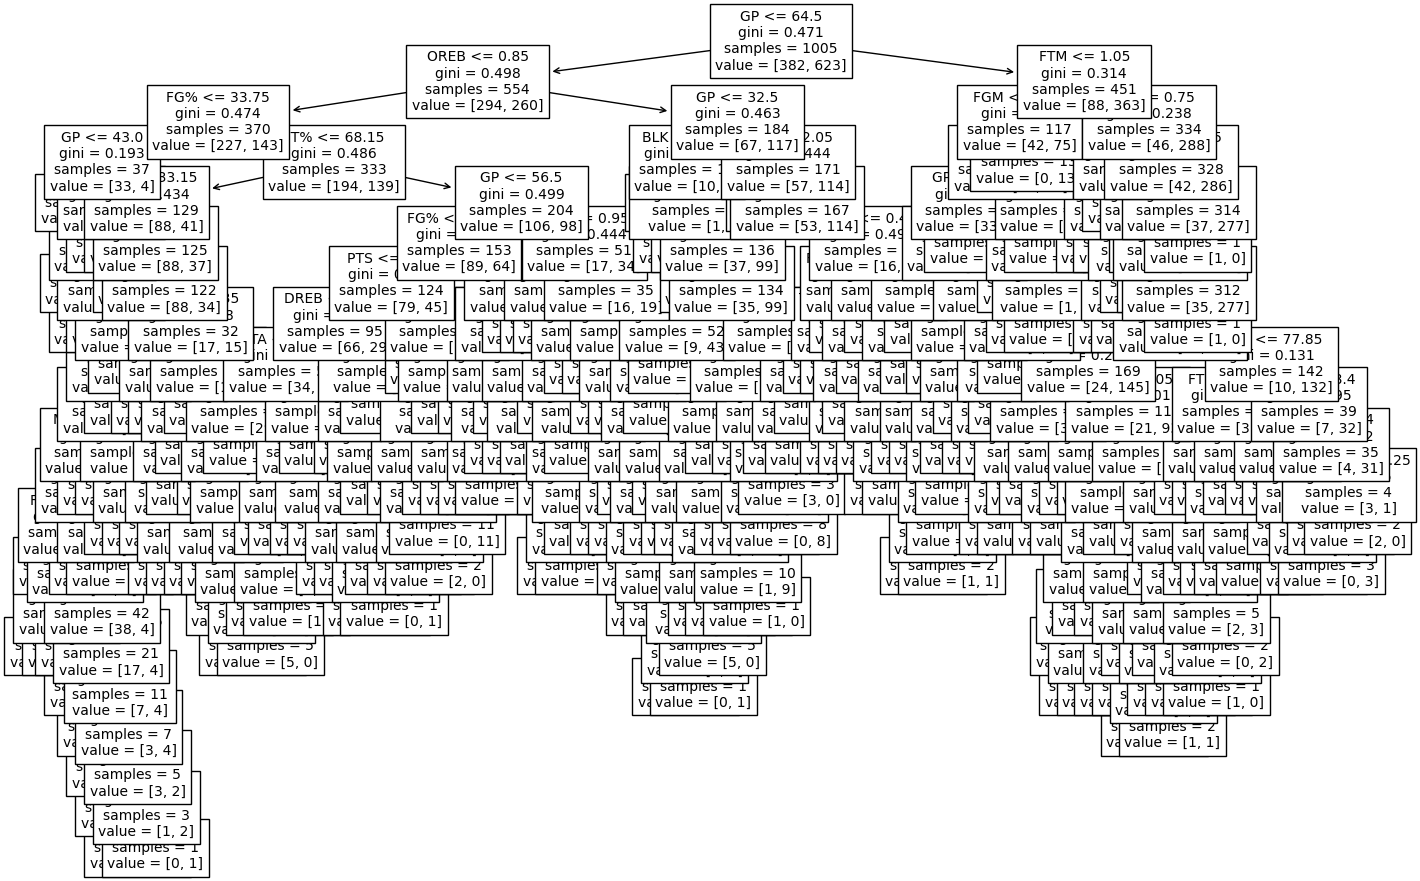

In [17]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

plus d'espace , ne pas tous afficher en trians les données les plus interressantes , affiché seulement les dernier resultats et non tous le tableau.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [19]:
# code..doit afficher un abre un peu plus lisible si tous vas bien

#### Question 2.8: Concluez

l'arbre nous permet montrer plus precisement la probabilité que un joueur NBA reste 5 ans dans un club. 